# 神經網路的基本原理

「神經網路」的原理並不如想像中那麼高不可攀。前兩週在 YouTube 上瞄到 IBM 的影片["Introduction to Neural Networks and DeepLearning using stand-alone Python"](https://www.youtube.com/watch?v=oJoPbwmVBlk) 好奇於光用 python 就能做出「神經網路」真的嗎？那好哇！因為有 demo 程式就一定能動手去 trace 也就是一定能多少懂一點，於是就點了進去看，結果。。。
### 老天！印度人講數學原理 -__-
幸好我聽懂了前半段，接著還是真的有很短、很短的 python demo 程式把他講的數學公式實現出來，最後一執行────誤差真的有收斂，我終於歡欣地確認原本想像中嚇死人的大學問，其實障礙很低。這下子我深深地著了迷，不可自已地又翻了好多 YouTube 前後參考把後半段也搞到半懂。以下是從這兩週還魂回來的心得報告。



## 基礎「神經網路」就是 Decoder

開始之前，我們先來複習一下 decoder（解碼器）有助於順順地理解「神經網路」是在幹嘛。

Decoder（解碼器）是 computer science 裡很基本的東西，學過了就很難真的忘記。任何問題只要是能用 decoder 解決的，那你用 decoder 就對了，它一定是最快最可靠的解決方案。順便複習一下，例如下圖就是簡單地用一個 decoder 實現的二進制加法器。Decoding 根本就是「查表」，從下圖左邊輸入的 a 與 b 兩個 binary bits 被 Adder 拿進去查「真值表」，根據表中的設計，立即查出什麼樣的 a,b 組合該輸出什麼樣的結果：sum 與 carry (進位)。簡單、粗暴、無腦而完美地產生正確的結果。即使到今天，CPU 內部的加法器應該還是 decoder 沒變吧？

In [1]:
from IPython.display import IFrame; IFrame("adder.pdf", width=600, height=400)

現在問題改成要辨認一張大小為 300X300 由黑點、白點構成的圖片，看圖片上是「貓」還是「狗」？我們可以直接採用與 Adder 十分類似的 decoder 來處理，如下圖：

In [2]:
IFrame("cat-dog-classifier.pdf", width=600, height=400)

這回這個 decoder 功能上的名稱由 Adder 塗改成 Cat/Dog Classifier（分類器,做貓狗照片分類）; 輸入端由 a,b 兩個 bits 塗改成 300X300 表示圖片上的每一 pixcel 點，總共 9 萬條輸入線，圖中用左側輸入端一個大箭頭示意；而最後的輸出則塗改成三種可能結果各別的概率。整體還是個 decoder，實際作法還是「查表」，把 9 萬條輸入線當成「地址」到 Cat/Dog Classifier 裡查出對應的位置裡預設好的三個概率值。如此，照樣無腦而正確地分辨任何一張 300X300 照片。

可是，這 Cat/Dog Classifier 肚子裡的這張表────恐怕整個宇宙都裝不下，這就是問題所在！何故？對照 Intel 的 386 CPU 有 32 條地址線，所以它的記憶體最多是 $2^{32}$ 即 4 GBytes, 此後每增加 10 條地址線，容量就擴大 1024 倍，呈等比級數增長。 眼前這個 docoder 要求的是一個 $2^{90000}$ 容量的表格，我不知道需要幾個宇宙才夠。

## 神之 Decoder 不可得，「神經網路」是個簡化方案

下圖是個「神經網路」的範例。最左邊的輸入 vector (也就是 array) 是 $X$。$X$ 經過連接網路 $W^{(1)}$ 加權之後，充分完全地連接到下一層「中間層」(也就是 hidden layer)。這裡豎著排列的三個圓圈代表三顆 neuron（神經元）────不要被它們的名稱嚇到了，其實一顆 neuron 就是把輸入全部加起來 (示意為圖中橘色的 ＋ 號) 得 $z_i^{(2)}$，下圖中 $z^{(2)}$ 標示在 neuron 偏左一點之處，表示它是所有輸入之「和」。因為前面那麼多東西加起來的數值會很發散，所以離開 neuron 輸出前要用一個 function 把前面的「和」mapping 到與前後層的 input / output 一致的範圍裡。例如，如果是 0～1 那麼大家都是 0～1。這個 mapping function 有很多選擇，統稱為 Activation Function，圖中標示為 $f_1$。$a^{(2)}$ 位在 neuron 偏右一點之處，表示它是 Hidden layer 一整層經過 Activation Functions 之後的輸出。

最右邊（輸出層）豎著排列的三顆 neuron（神經元）的結構與 hidden layer 幾乎一樣，但是這一層的 Activation Function 可以另選，所以標示為 $f_2$ 與前一層的 $f_1$ 區別。最右邊的輸出結果標示為 $\hat{y}$ 因為一般習慣訓練用的標準答案是 $y$ 此處 $\hat{y}$ 表示它是我們的神經網路猜測出來的結果。

這裡示範的「神經元」就只是「加法」跟 Activation Function 一前一後而已，用傳統電腦程式就可以模擬出來。這也正是我們以下數學原理說明過後緊接著要做的實驗。只要 $W^{(1)}$, $W^{(2)}$ 總共 2X9=18 條 weighting 填入設計良好的值，這個「神經網路」就可以做很多有用的事情了，雖然我們現在知道那只是在做 Decoder 的工作而已，神奇色彩大減，有沒有？ 這個「神經網路」唯二的兩個「變數」就是 $W^{(1)}$, $W^{(2)}$ 兩個 Matrix (矩陣). 神奇的地方是，這兩個 Matrix 變數的值，可以讓電腦自動化地產生，這是「神經網路」神奇的地方。


In [4]:
IFrame("nn-scatch-2.pdf", width=800, height=500)

## Forward Propagation

好消息先說，輸入資料 $X$ 經過 $W^{(1)}$ 加權在 $z^{(2)}$ 都加起來，這一串動作正好就是以前學過的向量 Dot Product （點積 或 內積）

$z^{(2)} = X \centerdot W^{(1)} \tag{1}$

請看 [n 維向量 Dot Product 的定義](https://baike.baidu.com/item/%E7%82%B9%E7%A7%AF/9648528?fromtitle=%E5%86%85%E7%A7%AF&fromid=422863) (Google 被擋) 如下：

$ 
A \centerdot B = 
\sum_{i=1}^n a_i b_i =
a_1 b_1  + a_2 b_2 + ... + a_n b_n \tag{2}
$

是不是正好？美妙吧！

如前述，這個 $z^{(2)}$ 的值會很發散，我們要用 Activation Function 把它 mapping 到一個整個網路一致的範圍裡，而得到 $a^{(2)}$ :

$
a^{(2)} = f_1(z^{(2)}) \tag{3}
$

$a^{(2)}$ 的地位就跟前一層的 $X$ 一樣，前一層的輸出成了下一層的輸入，所以下面兩條式子幾乎就是照抄前面的： 

$
z^{(3)} = a^{(2)} \centerdot W^{(2)} \tag{4}
$

$
\hat{y} = f_2(z^{(3)}) \tag{5}
$

得到了 $\hat{y}$ ，至於它準不準呢？全看 $W^{(1)}$, $W^{(2)}$ 調的好不好。 


## 翻譯成 python 

到這裡，我們趕快把上面的五條方程式用 python 改寫成電腦程式────看，竟然這麼直白！免得你還以為這些方程式可以嚇得倒人。

In [8]:
import numpy as np
def nn_forward(X, W1, W2):
    z2 = np.dot(X, W1)
    a2 = f1(z2)
    z3 = np.dot(a2, W2)
    yHat = f2(z3)
    return yHat

其中 f1(), f2() 兩個 Activation Function 是從 [一大堆選擇](https://en.wikipedia.org/wiki/Activation_function) 裡任選的，我們都將採用 sigmoid function. Sigmoid 是個把「負無限大」到「正無限大」整個 mapping 到 0～1 之間的 function. 這不是你該糾結的地方，知道意思會用就對了！ [Sigmoid function 的定義、它的導函數](http://mathworld.wolfram.com/SigmoidFunction.html)（下面會用到）如下： 

In [13]:
def sigmoid(x):  # Sigmoid function 就這樣而已  
    return 1/(1+np.exp(-x)) 

def sigmoidPrime(x):  # Sigmoid function 的導函數，上網查就有了，自己推導也很簡單，我們有得用即可，不必太深究。
    return sigmoid(x) * (1-sigmoid(x))

兩者的圖形如下： 

Populating the interactive namespace from numpy and matplotlib


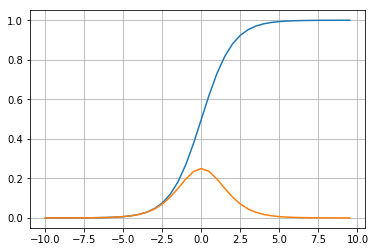

In [15]:
%pylab inline
t = np.arange(-10., 10., 0.5)
plot(t, sigmoid(t))
plot(t, sigmoidPrime(t))
grid(1);

有了 sigmoid() 之後，用來改寫上面的 nn_forward() 如下。這可不是示意而已，這是真正能跑的程式。只要給它妥善安排好的 W1, W2 兩個矩陣，從 X 把照片餵進去，它就真的能傳回這個神經網路預測的結果，「貓」、「狗」、「其他」，三者的概率。吃驚吧！寶貝。

In [1]:
def nn_forward(X, W1, W2):
    z2 = np.dot(X, W1)
    a2 = sigmoid(z2)  # f1 採用 sigmoid
    z3 = np.dot(a2, W2)
    yHat = sigmoid(z3)  # f2 也採用 sigmoid
    return yHat

# Cost Function 

讓電腦自動調整 $W^{(1)}$, $W^{(2)}$ 的基本構想跟我們在牆上掛一幅畫的邏輯是一樣的。先扶著隨便貼在牆上，然後你需要有人站遠處幫忙看，「整個往右邊挪一挪，高點、高點，左邊下降，再降。。。」這個在遠處幫忙看的人可比「神經網路」的 Cost Function, 也就是呈現誤差的辦法。這個辦法也是可以隨人安排的，令 $J$ 為 Cost Function 那麼最原始的辦法就是土土地直接說 $J$ 是 $y$ 與 $\hat{y}$ 的差距：

$
J = y - \hat{y} \tag{6}
$

然而，就像這位站遠處幫忙看的人一樣，他的視力是遠視、近視、青光眼、白內障，都無所謂，只要能一次一次地提供有效的意見以供逐步調整就行了。這個 Cost Function 只要與 $(y - \hat{y})$ 有個某種關係就行了，我們可以揉捏它，把弄成更有利的形式。例如：

$
J = \frac{1}{2}(y - \hat{y})^2 \tag{7}
$

就是很常見的一種 Cost Function. 取平方可以在誤差越大的時候讓 $J$ 劇烈地反映，反之當誤差越來越小時 $J$ 也變得精細，類似你停車入庫時也是這麼踩油門的。二次方程式，拋物線，就是有這樣的優點，所以比（6）式優秀。前置塞個 $\frac{1}{2}$ 上去不會影響 $J$ 的效用，等會兒就會明白它的好處。

下面請瞧瞧 （7）式 $J$ 的圖形，其中 delta 就是 $(y - \hat{y})$, 中央極小值處就是調整 $W^{(1)}$, $W^{(2)}$ 使得 $\hat{y}$ 成功逼近到 $y$ 之目的地。

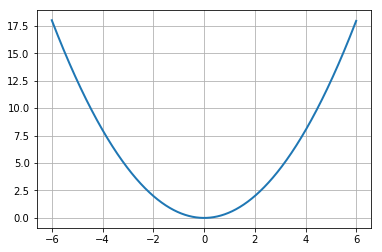

In [17]:
delta = arange(-6,6,0.01)   # delta 就是 y - yHat
plot(delta, 0.5*delta**2, linewidth= 2)
grid(1);

當「神經網路」的輸出是個 array 的時候，例如我們舉的例子是「貓」「狗」「其他」三個概率值，怎麼辦呢？沒關係，還是那句老話，怎麼做都行只要維持與 $(y - \hat{y})$ 有個某種關係就行了，最簡單就是把它們全都加起來：

$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{8}
$

$$
\frac{\partial J}{\partial W^{(2)}} = 
(a^{(2)})^T
\centerdot
\delta^{(3)} \tag{6}
$$

$$
\delta^{(3)} = -(y-\hat{y}) 
\times 
f^\prime(z^{(3)})   \tag{7}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}
\centerdot
\delta^{(2)} \tag{8}
$$

$$
\delta^{(2)} = \delta^{(3)} 
\centerdot
(W^{(2)})^{T}
\times
f^\prime(z^{(2)})  \tag{9}
$$